In [176]:
import pandas as pd 
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import random


In [177]:
# Read the data into a Pandas DataFrame
file_path = Path("C:\\Users\\61452\\OneDrive\\Desktop\\project4_group3_health_ml\\Resources\\heart_attack_prediction_dataset.csv")
#file_path = Path("\\Resources\\heart_attack_prediction_dataset.csv")
heart_df = pd.read_csv(file_path)
heart_df.head()



,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [178]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [179]:
columns_to_delete = ["Patient ID","Blood Pressure","Heart Rate","Diabetes","Family History","Smoking","Obesity","Alcohol Consumption","Exercise Hours Per Week","Diet","Previous Heart Problems","Medication Use","Stress Level","Sedentary Hours Per Day","Income","BMI","Triglycerides","Physical Activity Days Per Week","Sleep Hours Per Day","Country","Hemisphere"]
heart_df.drop(columns=columns_to_delete,inplace=True)


In [180]:
heart_bar=heart_df.loc[heart_df['Heart Attack Risk'] == 1]
heart_bar =heart_bar[["Continent","Heart Attack Risk"]]
heart_bar = heart_bar.groupby("Continent")
heart_count =heart_bar['Continent'].count()
heart_count

Continent
Africa           322
Asia             900
Australia        319
Europe           775
North America    324
South America    499
Name: Continent, dtype: int64

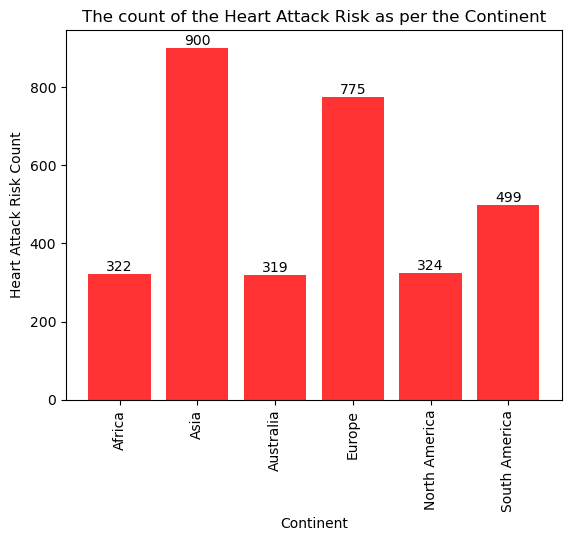

In [181]:
#Bar Chart for Heart Attack Risk as per the Continent
x_axis =heart_count.index.values
x_axis
y_axis = heart_count.values
y_axis
bars = plt.bar(x_axis, y_axis, color='r', alpha=0.8, align='center')
# Add count labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())),
             ha='center', va='bottom')

# Set the xlabel and ylabel, title using class methods
plt.title("The count of the Heart Attack Risk as per the Continent")
plt.xlabel("Continent")
plt.ylabel("Heart Attack Risk Count")
plt.xticks(rotation="vertical")
plt.savefig("C:\\Users\\61452\\OneDrive\\Desktop\\project4_group3_health_ml\\Resources\\Continent_count.png")
plt.show()


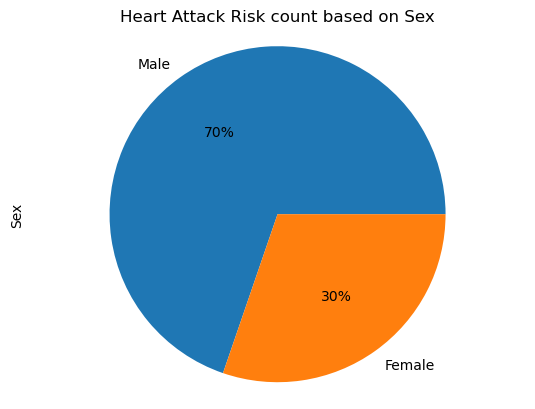

In [182]:
heart_pie=heart_df.loc[heart_df['Heart Attack Risk'] == 1]
heart_pie = heart_pie[["Sex","Heart Attack Risk"]]
heart_pie["Sex"].value_counts()
Sex=["Male", "Female"]
gender_data.plot(kind = "pie" , autopct="%1.0f%%", ylabel = "Sex")
plt.title('Heart Attack Risk count based on Sex')  # Set the title
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.savefig("C:\\Users\\61452\\OneDrive\\Desktop\\project4_group3_health_ml\\Resources\\Countbasedonsex.png")
plt.show()

In [186]:
#x = heart_df['Cholesterol']
#x
y = heart_df.loc[heart_df['Heart Attack Risk'] == 1]
plt.scatter(x, y)

# Add title and labels
#plt.title('Scatter Plot Example')
#plt.xlabel('X-axis')
#plt.ylabel('Y-axis')

# Show plot
#plt.show()


0       208
1       389
2       324
3       383
4       318
       ... 
8758    121
8759    120
8760    250
8761    178
8762    356
Name: Cholesterol, Length: 8763, dtype: int64